# Genre's Analysis

    The fellowing python code analyze the revenue of each kind of moive in past ten years.
    We can easily learn what kind of moive is easiest to make money.


In [1]:
#Import packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.25)
import itertools

In [2]:
#Import the data into a DF and view the first 5 entries

imdb = pd.read_csv('../Dataset/IMDB-Movie-Data.csv')
imdb.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


After we input data, we plot the revenue of movie and sort them by year.

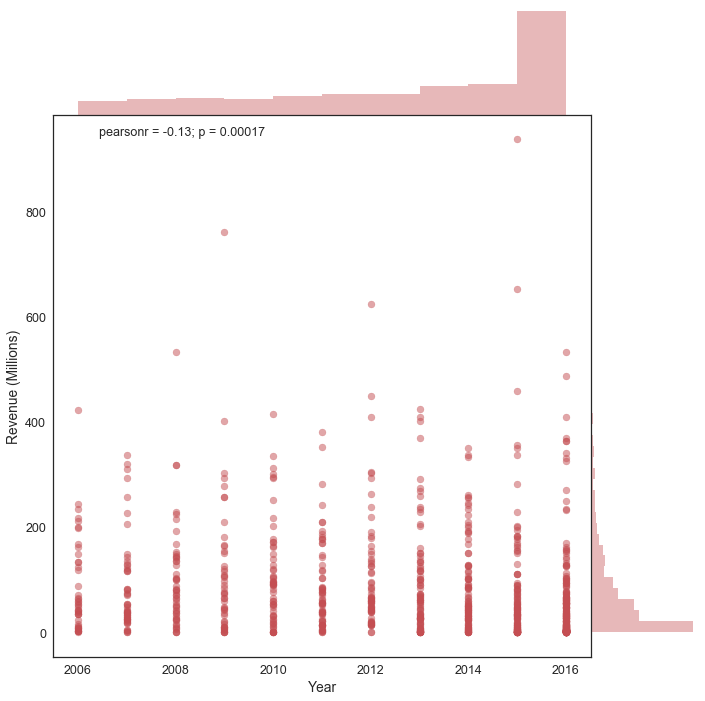

In [3]:
#Plot the Revenue in recent ten years
sns.jointplot(x='Year', y='Revenue (Millions)', data=imdb, alpha=0.5, color='r', size=10, space=0)

In [4]:
#Since most of these films in the data set are part of multiple genres, we need to get a list
#of entirely unique genres, without repeats, to see how many genres we are truly dealing with

unique_genres = imdb['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))
individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)
individual_genres


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre: 

Comedy 279
Romance 141
Drama 513
Biography 81
Fantasy 101
Western 7
Sci-Fi 120
History 29
Thriller 195
Mystery 106
Sport 18
Music 21
Action 303
Crime 150
War 13
Animation 49
Horror 119
Adventure 259
Musical 5
Family 51


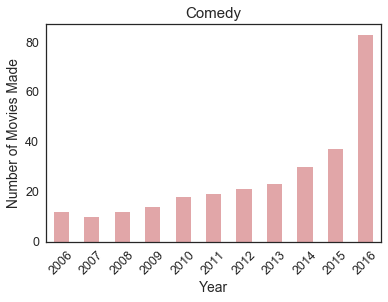

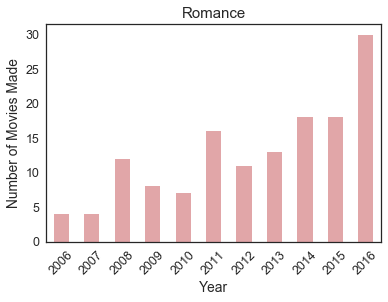

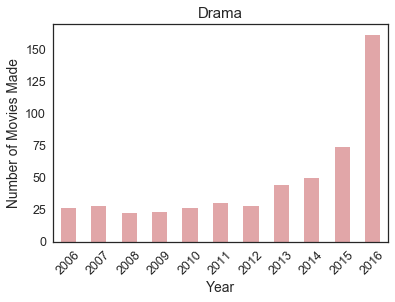

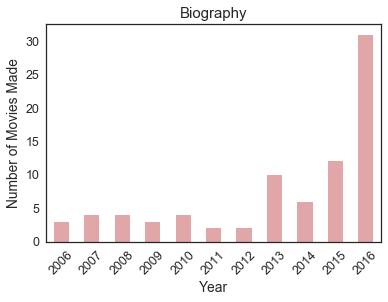

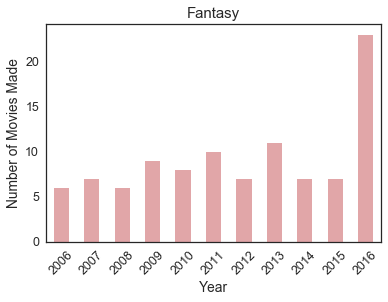

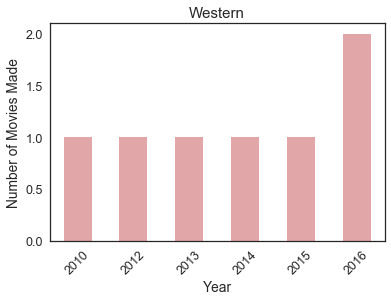

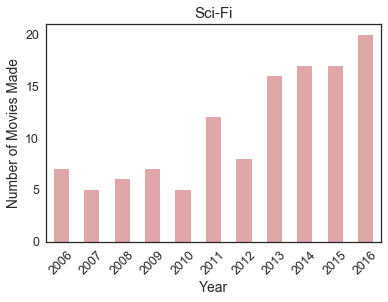

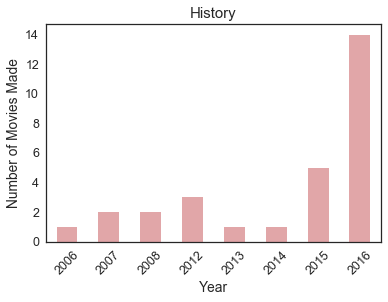

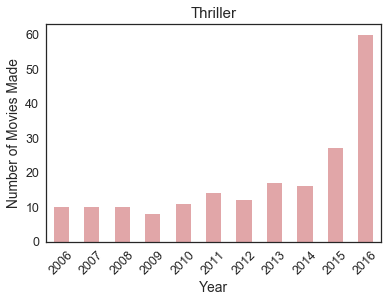

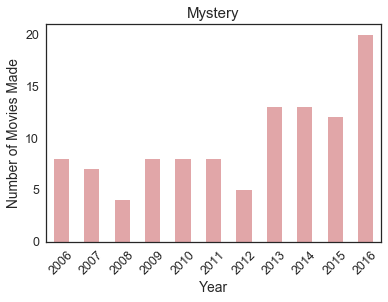

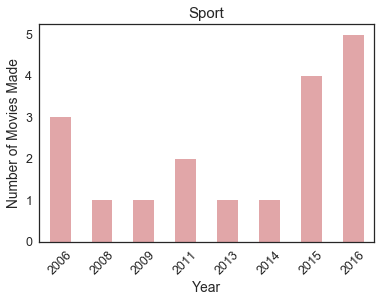

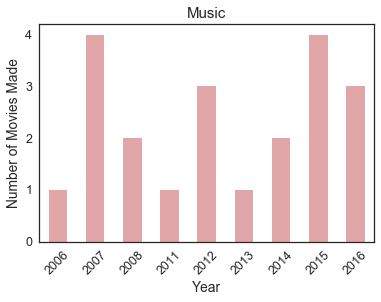

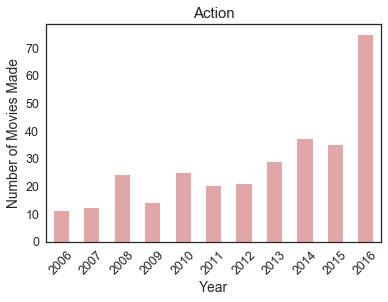

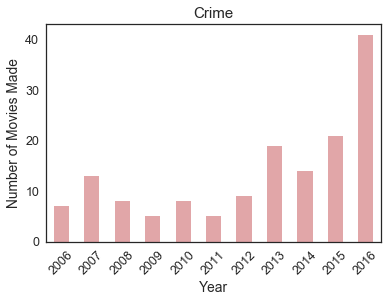

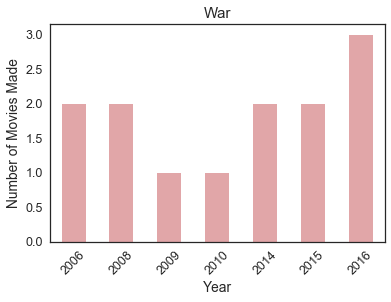

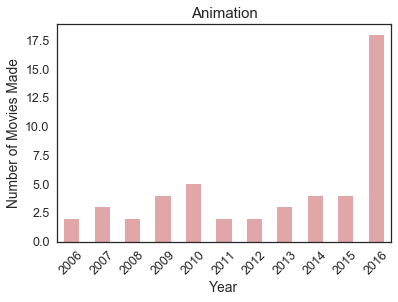

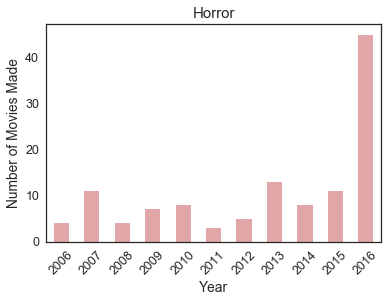

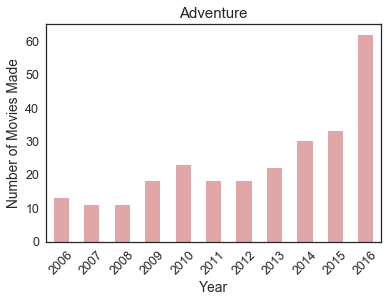

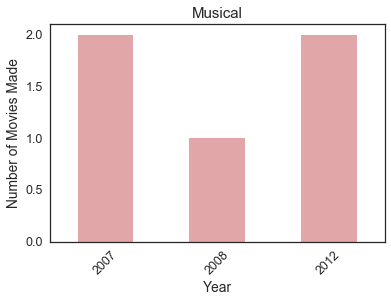

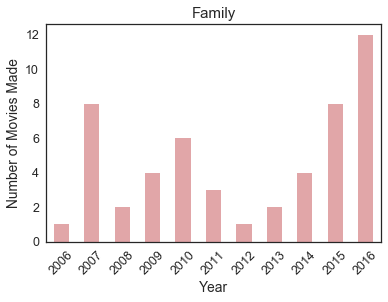

In [5]:
#Now we can iterate through each genre, counting the number of films that contain that genre
#then plot how many films of each genre were made by year onto a bar graph

print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    imdb[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(imdb[current_genre]))
    

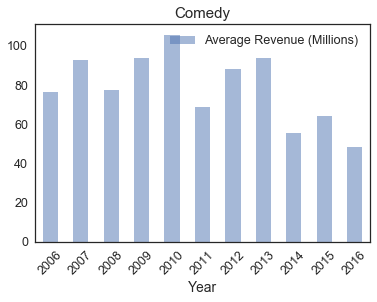

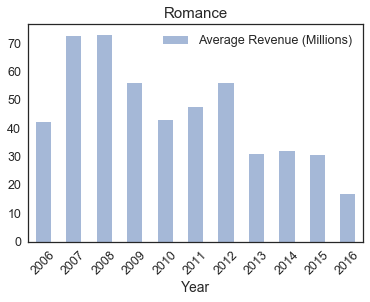

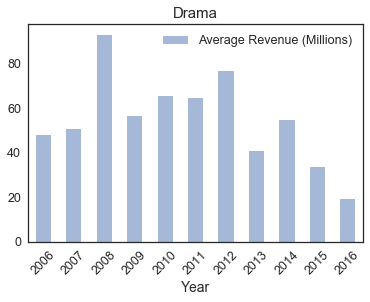

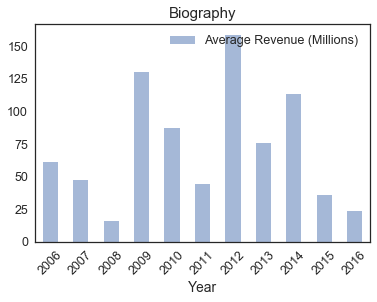

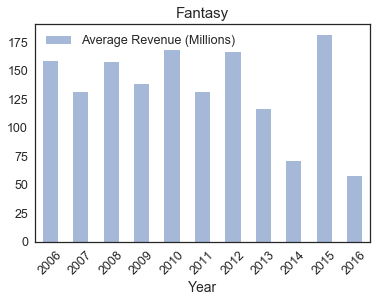

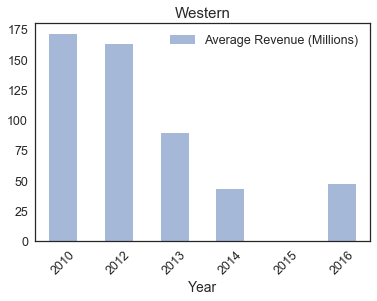

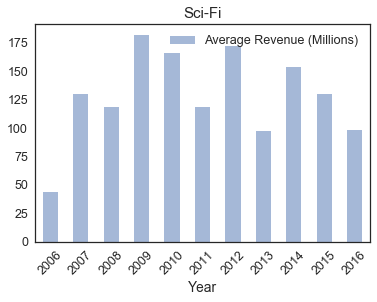

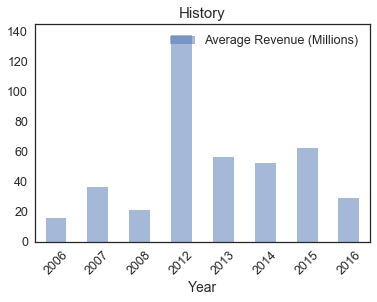

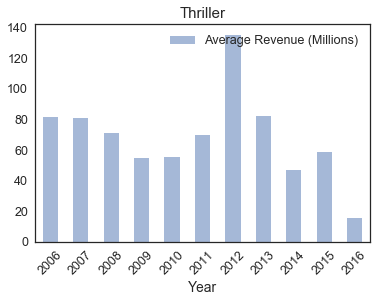

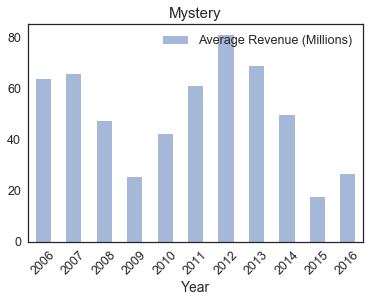

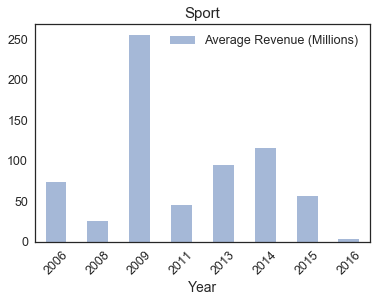

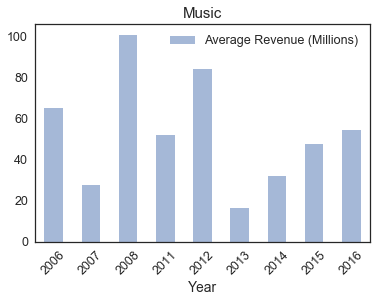

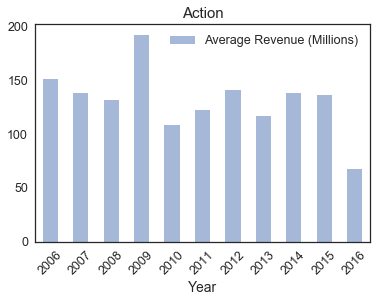

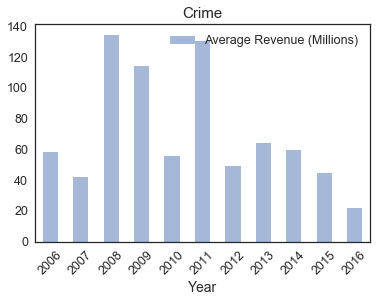

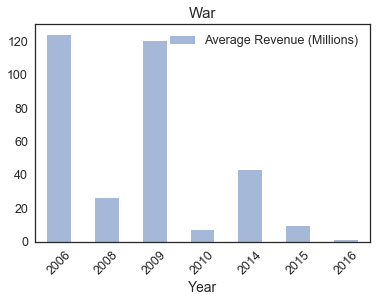

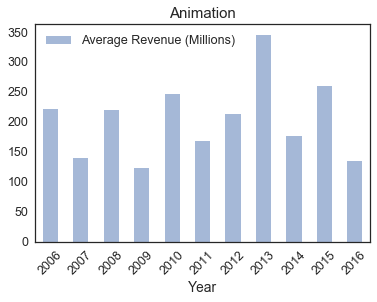

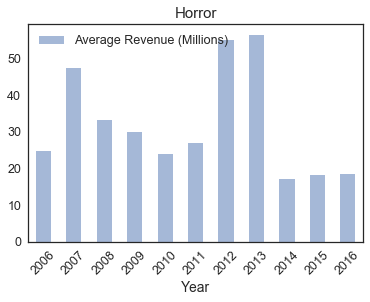

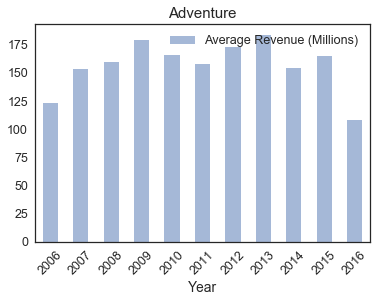

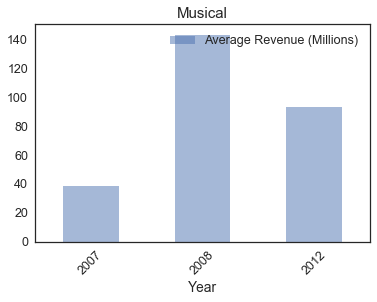

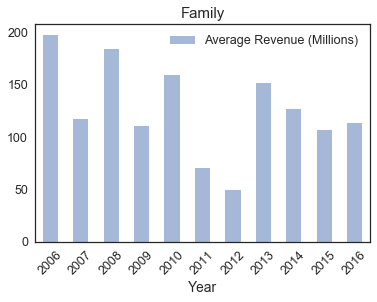

In [6]:
year={'Year':[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]}
YMR=pd.DataFrame(year)
for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    df = imdb[current_genre]
    genre_revenue=df[['Year','Revenue (Millions)']].fillna(0) 
    GR=genre_revenue.groupby('Year')['Revenue (Millions)'].agg(['sum','count']).fillna(0) 
    GR['Average Revenue (Millions)']=GR['sum']/GR['count']
    GR.plot(y='Average Revenue (Millions)',kind='bar', color='b', alpha=0.5, rot=45,title=genre)
    sum = genre_revenue['Revenue (Millions)'].sum()
    count = len(genre_revenue)
    AR=GR['Average Revenue (Millions)'].values
    if len(AR) == 11:
         YMR[genre]=[AR[0],AR[1],AR[2],AR[3],AR[4],AR[5],AR[6],AR[7],AR[8],AR[9],AR[10]]
    elif len(AR) == 6:
        YMR[genre]=[np.nan,np.nan,np.nan,np.nan,AR[0],np.nan,AR[1],AR[2],AR[3],AR[4],AR[5]]
    elif len(AR) ==3:
        YMR[genre]=[np.nan,AR[0],AR[1],np.nan,np.nan,np.nan,AR[2],np.nan,np.nan,np.nan,np.nan]
    elif len(AR) ==9:
        YMR[genre]=[AR[0],AR[1],AR[2],np.nan,np.nan,AR[3],AR[4],AR[5],AR[6],AR[7],AR[8]]
    elif len(AR) ==7:
        YMR[genre]=[AR[0],np.nan,AR[1],AR[2],AR[3],np.nan,np.nan,np.nan,AR[4],AR[5],AR[6]]
    elif len(AR) ==8:
        if genre == 'Western':
            YMR[genre]=[np.nan,np.nan,np.nan,np.nan,AR[0],np.nan,AR[1],AR[2],AR[3],AR[4],AR[5]]
        else:
            YMR[genre]=[AR[0],AR[1],AR[2],np.nan,np.nan,np.nan,AR[3],AR[4],AR[5],AR[6],AR[7]]    

In [7]:
YMR.head(11)

,Year,Comedy,Romance,Drama,Biography,Fantasy,Western,Sci-Fi,History,Thriller,...,Sport,Music,Action,Crime,War,Animation,Horror,Adventure,Musical,Family
0,2006,76.336667,42.077500,48.170000,61.343333,158.346667,NaN,43.827143,15.960000,81.673000,...,73.606667,65.270000,151.273636,58.191429,124.105,221.020000,24.682500,123.024615,NaN,197.990000
1,2007,92.704000,72.525000,50.500000,47.240000,131.707143,NaN,129.854000,36.635000,80.611000,...,24.850000,27.520000,138.478333,42.171538,NaN,138.770000,47.376364,153.278182,38.610,117.103750
2,2008,77.442500,73.094167,93.149545,15.692500,158.075000,NaN,118.931667,21.255000,71.285000,...,255.950000,100.855000,131.270000,134.736250,25.875,219.605000,33.157500,159.570909,143.700,183.755000
3,2009,93.662857,55.995000,56.290870,129.940000,138.285556,NaN,182.371429,NaN,54.971250,...,NaN,NaN,192.460000,114.250000,120.520,123.407500,29.895714,179.450556,NaN,110.347500
4,2010,105.794444,42.827143,65.632692,86.905000,168.007500,171.03,165.740000,NaN,55.117273,...,NaN,NaN,108.455200,55.502500,6.860,246.604000,23.941250,165.895652,NaN,159.753333
5,2011,68.814211,47.385625,64.749333,44.395000,131.715000,NaN,118.510000,NaN,69.570000,...,NaN,51.780000,122.569000,130.348000,NaN,167.535000,26.920000,157.611667,NaN,70.656667
6,2012,88.211905,56.084545,76.583214,159.110000,166.368571,162.80,172.352500,137.980000,135.587500,...,44.630000,84.096667,140.509524,49.362222,NaN,213.345000,54.896000,172.577778,93.645,49.000000
7,2013,93.633043,30.794615,40.752273,75.484000,116.452727,89.29,97.255000,56.670000,82.172353,...,95.000000,16.170000,116.272759,64.073684,NaN,345.760000,56.520769,184.101818,NaN,151.730000
8,2014,55.254333,31.982222,54.544000,113.780000,70.882857,42.62,153.545294,52.070000,46.583125,...,115.600000,31.775000,138.251892,59.431429,42.855,176.850000,17.073750,154.687333,NaN,127.000000
9,2015,63.951892,30.486667,33.529730,36.135833,181.960000,0.00,129.831765,62.456000,58.363333,...,56.357500,47.432500,136.440571,44.389048,9.350,259.877500,18.185455,164.933636,NaN,106.370000


In [8]:
YMR.pop('Year')
YMR.T

,0,1,2,3,4,5,6,7,8,9,10
Comedy,76.336667,92.704000,77.442500,93.662857,105.794444,68.814211,88.211905,93.633043,55.254333,63.951892,48.086145
Romance,42.077500,72.525000,73.094167,55.995000,42.827143,47.385625,56.084545,30.794615,31.982222,30.486667,16.657667
Drama,48.170000,50.500000,93.149545,56.290870,65.632692,64.749333,76.583214,40.752273,54.544000,33.529730,19.298086
Biography,61.343333,47.240000,15.692500,129.940000,86.905000,44.395000,159.110000,75.484000,113.780000,36.135833,23.669677
Fantasy,158.346667,131.707143,158.075000,138.285556,168.007500,131.715000,166.368571,116.452727,70.882857,181.960000,57.406087
Western,NaN,NaN,NaN,NaN,171.030000,NaN,162.800000,89.290000,42.620000,0.000000,46.690000
Sci-Fi,43.827143,129.854000,118.931667,182.371429,165.740000,118.510000,172.352500,97.255000,153.545294,129.831765,98.070000
History,15.960000,36.635000,21.255000,NaN,NaN,NaN,137.980000,56.670000,52.070000,62.456000,29.237143
Thriller,81.673000,80.611000,71.285000,54.971250,55.117273,69.570000,135.587500,82.172353,46.583125,58.363333,15.741167
Mystery,63.836250,65.448571,47.355000,25.296250,41.920000,61.068750,81.050000,68.596154,49.429231,17.505833,26.384000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb152b5eba8>], dtype=object)

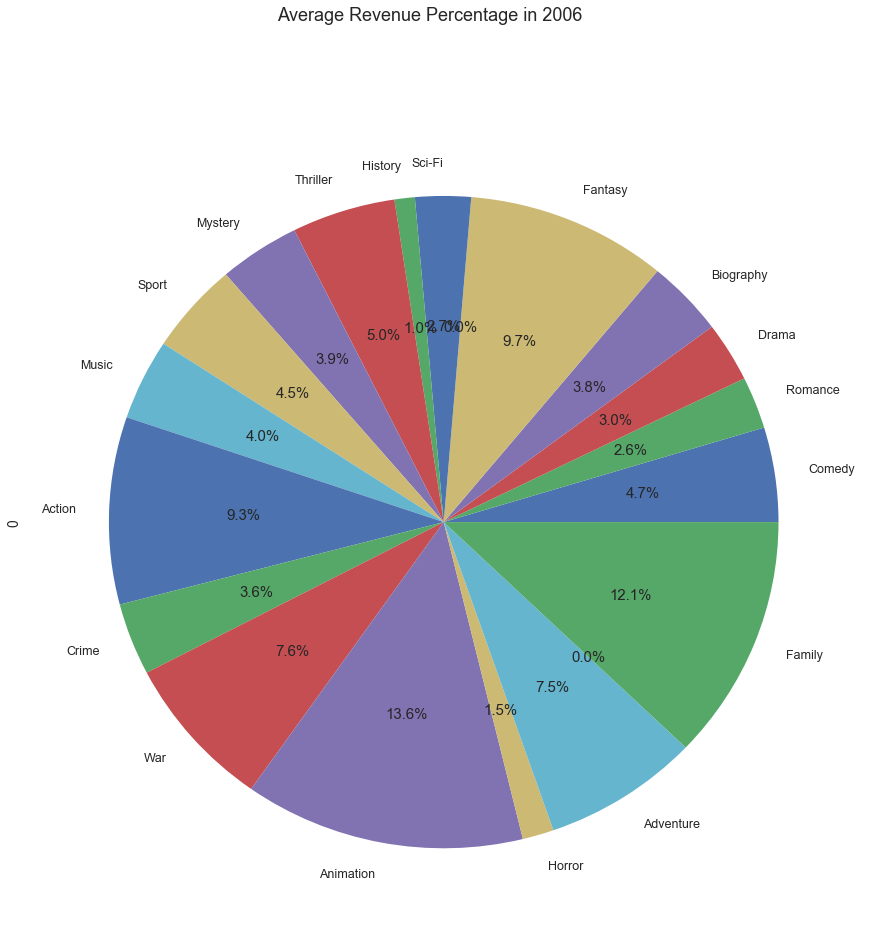

In [9]:
 YMR.T[0].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2006')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1529d6860>], dtype=object)

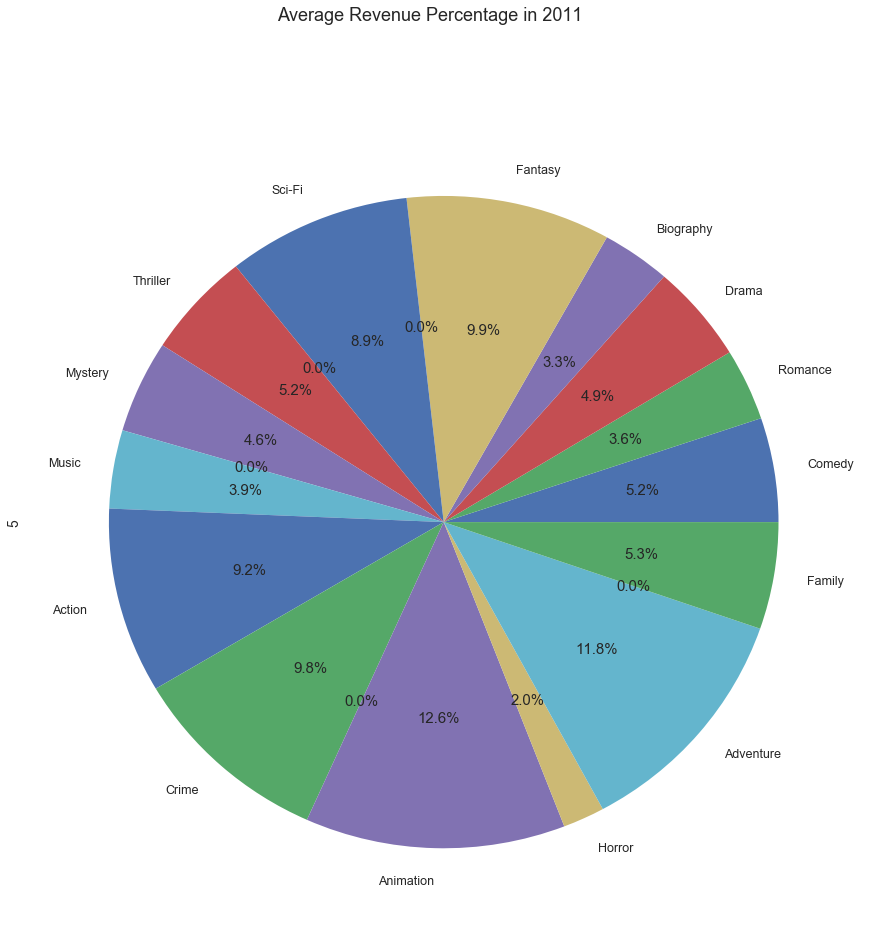

In [10]:
YMR.T[5].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2011')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb152935438>], dtype=object)

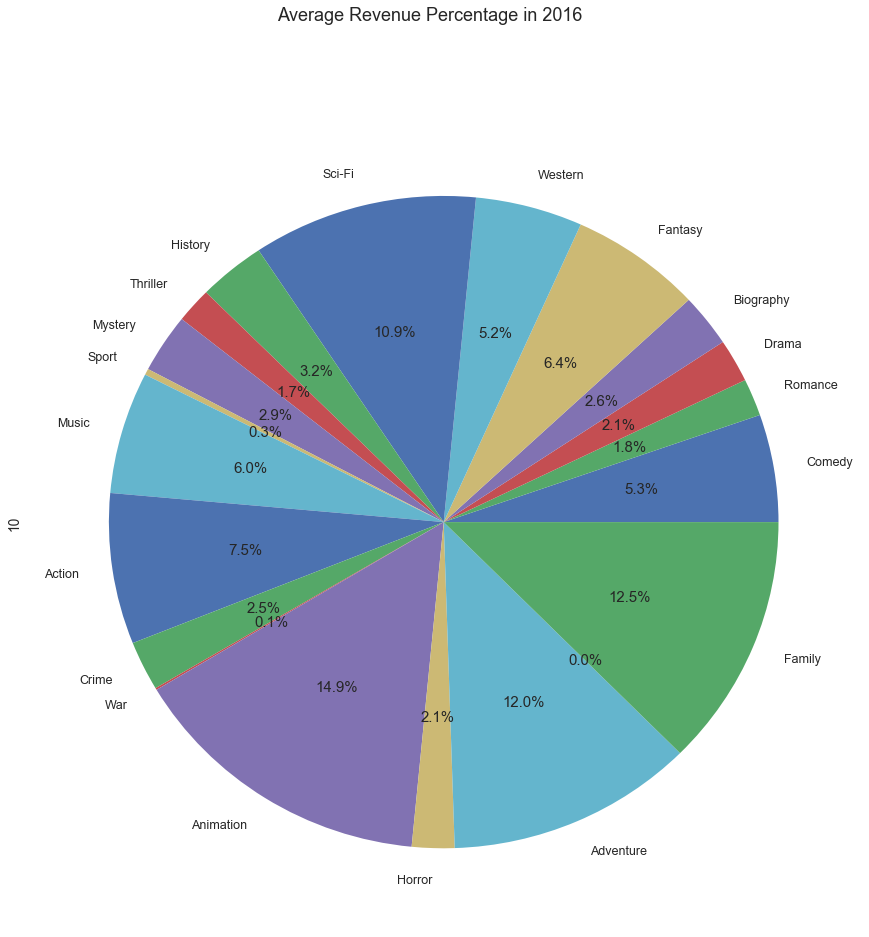

In [11]:
YMR.T[10].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2016')

# Summary
    By counting the average revenue of each kind of moive, we know that Animation moive is easiest to make money.
    However,the average revenue of all kine of moive are trend to decreasing. Maybe we need a revolution in moive industry.